# Project 2 - Exploratory Data Analysis

In [21]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('/Users/Beto/EBAC/Python avanzado/Kaggle/sales_month_2019')

# Preparacion de datos
  * Generacion de Dataframe master a partir de historicos

In [ ]:
# Se usa la funcion read_csv para leer los archivos .csv
# Trae los datos de cada mes
df1 = pd.read_csv('Sales_April_2019.csv')
df2 = pd.read_csv('Sales_August_2019.csv')
df3 = pd.read_csv('Sales_December_2019.csv')
df4 = pd.read_csv('Sales_February_2019.csv')
df5 = pd.read_csv('Sales_January_2019.csv')
df6 = pd.read_csv('Sales_July_2019.csv')
df7 = pd.read_csv('Sales_June_2019.csv')
df8 = pd.read_csv('Sales_March_2019.csv')
df9 = pd.read_csv('Sales_May_2019.csv')
df10 = pd.read_csv('Sales_November_2019.csv')
df11 = pd.read_csv('Sales_October_2019.csv')
df12 = pd.read_csv('Sales_September_2019.csv')

In [22]:
df = df1
df['Month'] = '2019-04-01'

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-01
1,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-01
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-01
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-01
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-01


In [24]:
# Aca le agrego la columna Month y le agrego el primer dia del mes correspondiente
df2['Month'] = '2019-08-01'
df3['Month'] = '2019-12-01'
df5['Month'] = '2019-01-01'
df6['Month'] = '2019-07-01'
df7['Month'] = '2019-06-01'
df8['Month'] = '2019-03-01'
df09['Month'] = '2019-05-01'
df10['Month'] = '2019-11-01'
df11['Month'] = '2019-10-01'
df12['Month'] = '2019-09-01'

In [ ]:
# Con esto concateno todos los dataframes
df= pd.concat([df2, df3, df5, df6, df7, df8, df09, df10,df11,df12], ignore_index=True)

In [28]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
105084,208384,Apple Airpods Headphones,1,150,05/14/19 15:58,"895 Walnut St, Portland, OR 97035",2019-05-01
19510,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-01
84970,171686,USB-C Charging Cable,1,11.95,03/08/19 11:58,"13 Jackson St, Los Angeles, CA 90001",2019-03-01
128652,263441,Wired Headphones,1,11.99,10/16/19 19:24,"690 Lincoln St, Austin, TX 73301",2019-10-01
145408,248792,Bose SoundSport Headphones,1,99.99,09/08/19 23:22,"705 2nd St, San Francisco, CA 94016",2019-09-01
90308,194317,Flatscreen TV,1,300,05/31/19 21:30,"493 Lincoln St, New York City, NY 10001",2019-05-01
83398,170173,34in Ultrawide Monitor,1,379.99,03/20/19 23:21,"285 Hickory St, Seattle, WA 98101",2019-03-01
64004,212566,Lightning Charging Cable,1,14.95,06/16/19 14:49,"456 North St, Seattle, WA 98101",2019-06-01
49729,225673,USB-C Charging Cable,1,11.95,07/21/19 14:29,"322 5th St, San Francisco, CA 94016",2019-07-01
139174,273493,iPhone,1,700,10/13/19 15:55,"779 South St, Los Angeles, CA 90001",2019-10-01


In [32]:
#Ver las ventas tot"ales por mes
df.groupby("Month")["Month"].count()


Month
2019-01-01     9723
2019-03-01    15226
2019-05-01    16635
2019-06-01    13622
2019-07-01    14371
2019-08-01    12011
2019-09-01    11686
2019-10-01    20379
2019-11-01    17661
2019-12-01    25117
Name: Month, dtype: int64

<Axes: xlabel='Month'>

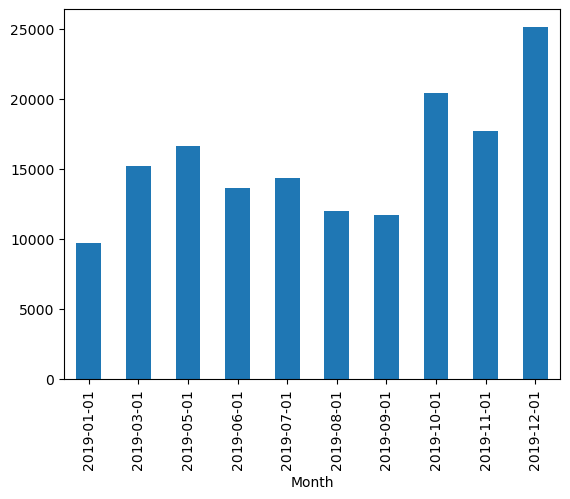

In [ ]:
# Ver las ventas totales por mes
df.groupby("Month")["Month"].count().plot.bar()

# Masajeo de datos

In [34]:
# Eliminar los nulos
df = df.dropna(how='all')

In [35]:
df['Order Date']

0         08/31/19 22:21
1         08/15/19 15:11
2         08/06/19 14:40
3         08/29/19 20:59
4         08/15/19 19:53
               ...      
156426    09/17/19 20:56
156427    09/01/19 16:00
156428    09/23/19 07:39
156429    09/19/19 17:30
156430    09/30/19 00:18
Name: Order Date, Length: 156431, dtype: object

In [36]:
# Eliminar las casdenas especiales para la fecha del pedido
df = df[df['Order Date'].str[0:2] != 'Or']

In [37]:
# Todos los datos son tipo object, lo cual nos dificultara las cosas
# Se cambia el tipo de datos para facilitar el procesamiento

# Convert la columna 'Date' a tipo datetime format
df['Month'] = pd.to_datetime(df['Month'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\Beto\AppData\Local\Temp\ipykernel_17748\3344438079.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156129 entries, 0 to 156430
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          155675 non-null  object        
 1   Product           155675 non-null  object        
 2   Quantity Ordered  155675 non-null  object        
 3   Price Each        155675 non-null  object        
 4   Order Date        155675 non-null  datetime64[ns]
 5   Purchase Address  155675 non-null  object        
 6   Month             156129 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 9.5+ MB


In [39]:
# Se debe de tener cuidado con las cantidades (vamos a ver quer todos sen validos)
df['Quantity Ordered'].unique()

array(['2', '1', '3', '4', nan, '6', '7', '5', '8', '9'], dtype=object)

In [40]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019-08-01
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019-08-01
2,236672,iPhone,1,700.0,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019-08-01
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019-08-01
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019-08-01


In [43]:
# Conversion de las columnas numericas y las columnas de string a string
df['Order ID'] = df['Order ID'].astype('string')
df['Product'] = df['Product'].astype('string')

df['Quantity Ordered'] = df['Quantity Ordered'].fillna(0)
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')

df['Price Each'] = df['Price Each'].astype('float')

df['Purchase Address'] = df['Purchase Address'].astype('string')


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156129 entries, 0 to 156430
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          155675 non-null  string        
 1   Product           155675 non-null  string        
 2   Quantity Ordered  156129 non-null  int64         
 3   Price Each        155675 non-null  float64       
 4   Order Date        155675 non-null  datetime64[ns]
 5   Purchase Address  155675 non-null  string        
 6   Month             156129 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), string(3)
memory usage: 9.5 MB


In [46]:
# Vamos a ver el numero de datos vacios por cada columna
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

Order ID            454
Product             454
Quantity Ordered      0
Price Each          454
Order Date          454
Purchase Address    454
Month                 0
dtype: int64

In [48]:
# Calcula el % total de datos no existentes
# Cuantos datos totakes tenemos, y cuantos missing
total_cells = np.prod(df.shape)
total_missing = missing_values_count.sum()
# Calculo el porcentaje
percent_missing = (total_missing / total_cells) * 100
print(f"Porcentaje de datos que no existe: {percent_missing:.2f}%")

Porcentaje de datos que no existe: 0.21%


In [49]:
# Elimino todos los datos donde el auqntity order es igual a cero
df[df['Quantity Ordered'] == 0]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
312,<NA>,<NA>,0,NaN,NaT,<NA>,2019-08-01
1222,<NA>,<NA>,0,NaN,NaT,<NA>,2019-08-01
2648,<NA>,<NA>,0,NaN,NaT,<NA>,2019-08-01
2685,<NA>,<NA>,0,NaN,NaT,<NA>,2019-08-01
3119,<NA>,<NA>,0,NaN,NaT,<NA>,2019-08-01
...,...,...,...,...,...,...,...
154757,<NA>,<NA>,0,NaN,NaT,<NA>,2019-09-01
155019,<NA>,<NA>,0,NaN,NaT,<NA>,2019-09-01
155623,<NA>,<NA>,0,NaN,NaT,<NA>,2019-09-01
156129,<NA>,<NA>,0,NaN,NaT,<NA>,2019-09-01


In [50]:
# Lo que se hace es que se segmentan los datos que son mayores a 0
df = df[df['Quantity Ordered'] > 0]

In [53]:
# Numeros de datos vacios por columnas
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [56]:
# Ver las estadisticas de las columnas
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Quantity Ordered,Price Each,Order Date,Month
count,155675.00,155675.00,155675,155675
mean,1.12,184.52,2019-08-10 18:20:08.587891712,2019-07-26 05:14:58.942026752
min,1.00,2.99,2019-01-01 03:07:00,2019-01-01 00:00:00
25%,1.00,11.95,2019-05-27 12:40:30,2019-05-01 00:00:00
50%,1.00,14.95,2019-08-23 14:18:00,2019-08-01 00:00:00
75%,1.00,150.00,2019-11-07 12:16:30,2019-11-01 00:00:00
max,9.00,1700.00,2020-01-01 05:13:00,2019-12-01 00:00:00
std,0.44,333.49,NaN,NaN


In [57]:
# Para ver las direcciones
df['Purchase Address']

0                359 Spruce St, Seattle, WA 98101
1                  492 Ridge St, Dallas, TX 75001
2                  149 7th St, Portland, OR 97035
3               631 2nd St, Los Angeles, CA 90001
4            736 14th St, New York City, NY 10001
                           ...                   
156426     840 Highland St, Los Angeles, CA 90001
156427    216 Dogwood St, San Francisco, CA 94016
156428       220 12th St, San Francisco, CA 94016
156429     511 Forest St, San Francisco, CA 94016
156430     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 155675, dtype: string

In [58]:
# Se genera la columna zipcode, tomando los ultimos 5 digitos de la direccion
df['Zipcode'] = df['Purchase Address'].str[-6:]

In [60]:
# Total de Zipcodes analizados
df['Zipcode'].unique()

<StringArray>
[' 98101', ' 75001', ' 97035', ' 90001', ' 10001', ' 94016', ' 02215',
 ' 30301', ' 73301', ' 04101']
Length: 10, dtype: string

In [62]:
# Cambio la columna Zipcode a String
df['Zipcode'] = df['Zipcode'].astype('string')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155675 entries, 0 to 156430
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          155675 non-null  string        
 1   Product           155675 non-null  string        
 2   Quantity Ordered  155675 non-null  int64         
 3   Price Each        155675 non-null  float64       
 4   Order Date        155675 non-null  datetime64[ns]
 5   Purchase Address  155675 non-null  string        
 6   Month             155675 non-null  datetime64[ns]
 7   Zipcode           155675 non-null  string        
dtypes: datetime64[ns](2), float64(1), int64(1), string(4)
memory usage: 10.7 MB


In [64]:
# Se cuente el numero de zipcodes
num_zipcodes = df['Zipcode'].unique().__len__()
num_zipcodes

10

In [65]:
# Numero de valores unicos
# para ver la estructura interna de cada columna - que tan variada es
df.nunique()

Order ID            149393
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          119186
Purchase Address    122295
Month                   10
Zipcode                 10
dtype: int64

In [69]:
# Look for null values in all columns of the dataframe
print('Hay', df.isnull().sum().sum(), ' missing values')

Hay 0  missing values


# Analisis de correlacion

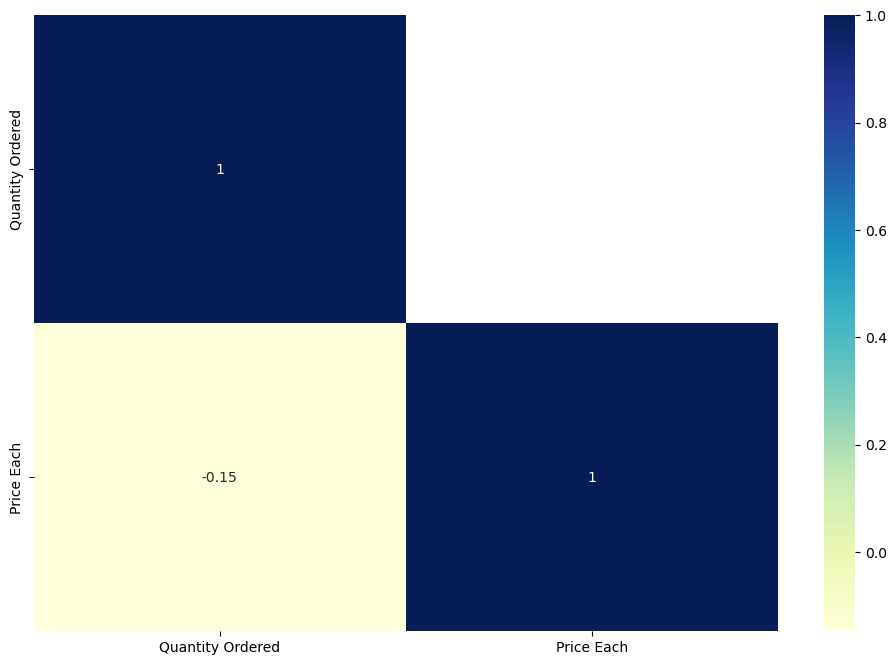

In [73]:
# Grafico de correlacion
plt.figure(figsize=(12,8))
corr_df = df.select_dtypes(include=[np.number]).corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap="YlGnBu", annot=True)

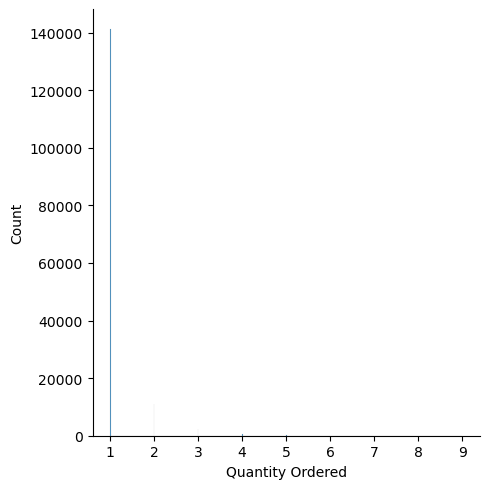

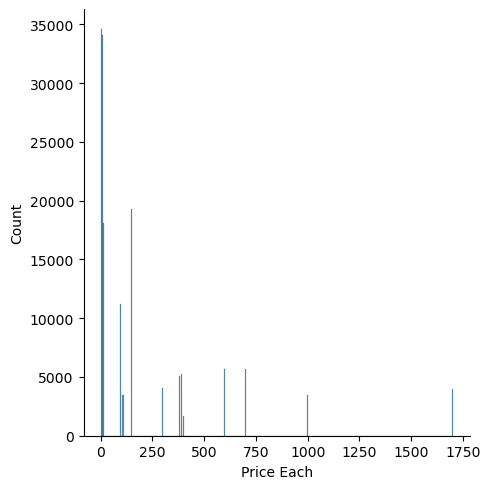

In [77]:
# Grafica exploratoria de todas las columnas
sns.displot(df['Quantity Ordered'], kde=False)
sns.displot(df['Price Each'], kde=False)

# Agrupamientos

In [ ]:
# Agrupamientos general por variables: Month
# Este es el ticket promedio
df.groupby(["Month"]).mean(numeric_only=True)


,Quantity Ordered,Price Each
Month,,
2019-01-01,1.12,186.45
2019-03-01,1.12,184.32
2019-05-01,1.13,188.90
2019-06-01,1.13,189.03
2019-07-01,1.12,184.15
2019-08-01,1.12,186.53
2019-09-01,1.13,179.40
2019-10-01,1.12,183.18
2019-11-01,1.13,180.88


In [85]:
# Agrupamiento general por variable: Product
# La mediana de cada orden es de un producto, con diferentes precios por cada producto
df.groupby(["Product"]).median(numeric_only=True)

,Quantity Ordered,Price Each
Product,,
20in Monitor,1.00,109.99
27in 4K Gaming Monitor,1.00,389.99
27in FHD Monitor,1.00,149.99
34in Ultrawide Monitor,1.00,379.99
AA Batteries (4-pack),1.00,3.84
AAA Batteries (4-pack),1.00,2.99
Apple Airpods Headphones,1.00,150.00
Bose SoundSport Headphones,1.00,99.99
Flatscreen TV,1.00,300.00


<Axes: xlabel='Product'>

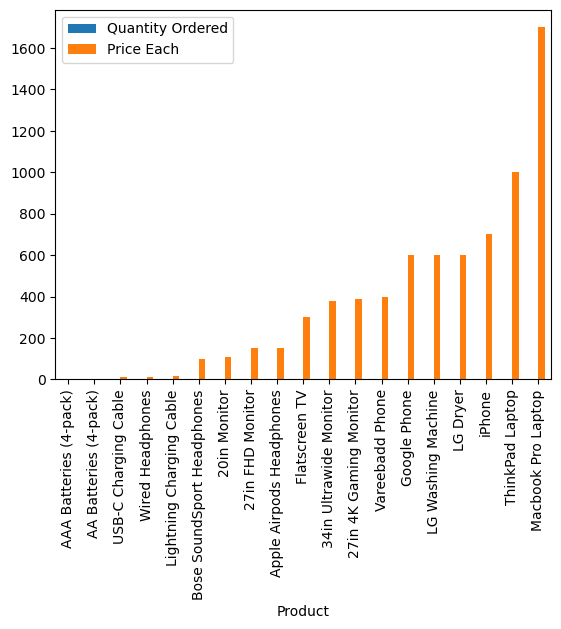

In [86]:
df.groupby(["Product"]).median(numeric_only=True).sort_values(by="Price Each").plot.bar()

# Analisis Bivariado

In [89]:
# Analisis Bivariado de numeros de ventas por mes y por zipcode
pd.crosstab(df['Zipcode'],df['Month'])
#  Numero de ventas en cada mes por Zipcode

Month,2019-01-01,2019-03-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
Zipcode,,,,,,,,,,
02215,1048,1648,1800,1392,1552,1245,1283,2176,1918,2698
04101,123,188,222,197,199,165,145,251,230,315
10001,1303,1981,2268,1776,1930,1626,1536,2648,2355,3408
30301,786,1245,1331,1104,1146,941,915,1605,1412,1988
73301,527,840,839,715,762,649,666,1090,868,1350
75001,785,1202,1420,1066,1098,968,935,1639,1371,2005
90001,1529,2456,2568,2201,2235,1867,1884,3294,2750,3894
94016,2354,3597,3921,3304,3530,2833,2734,4767,4322,6021
97035,500,795,944,745,720,657,594,1135,934,1333


<Axes: xlabel='Month'>

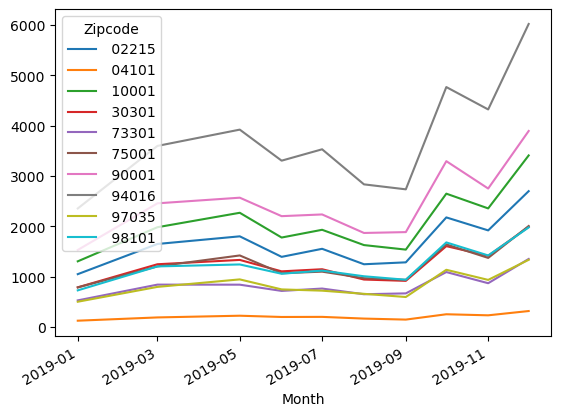

In [91]:
pd.crosstab(df['Month'],df['Zipcode']).plot()

# Descubrimientos

In [92]:
# Antes que nada, generamos un campo de ventas (que no existe)
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']

In [125]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Zipcode,Total Sales
111498,283382,AA Batteries (4-pack),1,3.84,2019-11-14 13:50:00,"627 North St, Boston, MA 02215",2019-11-01,02215,3.84
7620,243963,USB-C Charging Cable,1,11.95,2019-08-27 12:21:00,"484 Wilson St, Los Angeles, CA 90001",2019-08-01,90001,11.95
115243,286959,Macbook Pro Laptop,1,1700.00,2019-11-19 09:40:00,"725 4th St, Los Angeles, CA 90001",2019-11-01,90001,1700.00
110236,282180,Apple Airpods Headphones,1,150.00,2019-11-17 17:06:00,"522 South St, Los Angeles, CA 90001",2019-11-01,90001,150.00
22722,305883,AAA Batteries (4-pack),2,2.99,2019-12-01 22:50:00,"599 Jackson St, Dallas, TX 75001",2019-12-01,75001,5.98


* Top Productos por Ventas

In [128]:
pd.crosstab(df['Product'], df['Month'], values = df['Total Sales'], aggfunc='sum', margins=True)

Month,2019-01-01 00:00:00,2019-03-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,All
Product,,,,,,,,,,,
20in Monitor,23647.85,35856.74,37396.60,35306.79,35966.73,28817.38,30467.23,47075.72,46305.79,62804.29,383645.12
27in 4K Gaming Monitor,121676.88,186805.21,211374.58,176275.48,188365.17,171205.61,148976.18,281962.77,225414.22,335781.39,2047837.49
27in FHD Monitor,62845.81,91343.91,103193.12,85194.32,90743.95,73795.08,72295.18,118792.08,107692.82,144740.35,950636.62
34in Ultrawide Monitor,119316.86,199114.76,206714.56,172515.46,175555.38,144776.19,143636.22,255353.28,208994.50,322611.51,1948588.72
AA Batteries (4-pack),5472.00,8509.44,9150.72,8044.80,7956.48,7011.84,6808.32,11285.76,10099.20,14277.12,88615.68
AAA Batteries (4-pack),4772.04,7409.22,8763.69,6458.40,7074.34,6036.81,5761.73,10052.38,9050.73,12677.60,78056.94
Apple Airpods Headphones,122100.00,198150.00,203850.00,175050.00,183150.00,151500.00,145200.00,251100.00,226500.00,311850.00,1968450.00
Bose SoundSport Headphones,65893.41,119688.03,117388.26,98390.16,105989.40,87991.20,82991.70,146485.35,125087.49,182481.75,1132386.75
Flatscreen TV,72900.00,108600.00,119700.00,110100.00,119700.00,99300.00,88200.00,157500.00,138300.00,199500.00,1213800.00


In [129]:
# Generar la tabla pivote resumida de ventas por producto y mes
pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['Product'], aggfunc=sum).fillna(0).reset_index()

C:\Users\Beto\AppData\Local\Temp\ipykernel_17748\3932701591.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['Product'], aggfunc=sum).fillna(0).reset_index()


Product,Month,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
0,2019-01-01,23647.85,121676.88,62845.81,119316.86,5472.00,4772.04,122100.00,65893.41,72900.00,190800.00,23400.00,25200.00,17207.45,399500.00,216997.83,15343.80,50000.00,12961.19,265300.00
1,2019-03-01,35856.74,186805.21,91343.91,199114.76,8509.44,7409.22,198150.00,119688.03,108600.00,277800.00,30000.00,38400.00,28031.25,646000.00,343996.56,23230.80,69600.00,19927.38,376600.00
2,2019-05-01,37396.60,211374.58,103193.12,206714.56,9150.72,8763.69,203850.00,117388.26,119700.00,288000.00,45600.00,38400.00,31051.15,787100.00,367996.32,24724.55,74400.00,22481.25,447300.00
3,2019-06-01,35306.79,176275.48,85194.32,172515.46,8044.80,6458.40,175050.00,98390.16,110100.00,234600.00,25800.00,33000.00,25235.60,605200.00,314996.85,20028.20,62000.00,17697.24,372400.00
4,2019-07-01,35966.73,188365.17,90743.95,175555.38,7956.48,7074.34,183150.00,105989.40,119700.00,246600.00,33000.00,31200.00,27089.40,625600.00,317996.82,22071.65,58000.00,18740.37,352100.00
5,2019-08-01,28817.38,171205.61,73795.08,144776.19,7011.84,6036.81,151500.00,87991.20,99300.00,216000.00,27600.00,28800.00,21542.95,508300.00,274997.25,17470.90,57200.00,15467.10,306600.00
6,2019-09-01,30467.23,148976.18,72295.18,143636.22,6808.32,5761.73,145200.00,82991.70,88200.00,205200.00,18000.00,27600.00,21423.35,489600.00,248997.51,19048.30,50400.00,15610.98,278600.00
7,2019-10-01,47075.72,281962.77,118792.08,255353.28,11285.76,10052.38,251100.00,146485.35,157500.00,358200.00,30000.00,36600.00,38421.50,892500.00,459995.40,31894.55,81200.00,27265.26,501200.00
8,2019-11-01,46305.79,225414.22,107692.82,208994.50,10099.20,9050.73,226500.00,125087.49,138300.00,295200.00,33600.00,31800.00,33084.35,748000.00,373996.26,26947.25,70800.00,23236.62,464800.00
9,2019-12-01,62804.29,335781.39,144740.35,322611.51,14277.12,12677.60,311850.00,182481.75,199500.00,429600.00,51600.00,48000.00,46180.55,1094800.00,540994.59,38849.45,114000.00,32948.52,635600.00


In [130]:
dfsales = pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['Product'], aggfunc=sum).fillna(0).reset_index()

C:\Users\Beto\AppData\Local\Temp\ipykernel_17748\1620112511.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfsales = pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['Product'], aggfunc=sum).fillna(0).reset_index()


In [131]:
# Cuadro con el porcentaje de ventas de cada producto para cada mes 
dfsales[list(dfsales.columns)[1:20]].pct_change()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.52,0.54,0.45,0.67,0.56,0.55,0.62,0.82,0.49,0.46,0.28,0.52,0.63,0.62,0.59,0.51,0.39,0.54,0.42
2,0.04,0.13,0.13,0.04,0.08,0.18,0.03,-0.02,0.10,0.04,0.52,0.00,0.11,0.22,0.07,0.06,0.07,0.13,0.19
3,-0.06,-0.17,-0.17,-0.17,-0.12,-0.26,-0.14,-0.16,-0.08,-0.19,-0.43,-0.14,-0.19,-0.23,-0.14,-0.19,-0.17,-0.21,-0.17
4,0.02,0.07,0.07,0.02,-0.01,0.10,0.05,0.08,0.09,0.05,0.28,-0.05,0.07,0.03,0.01,0.10,-0.06,0.06,-0.05
5,-0.20,-0.09,-0.19,-0.18,-0.12,-0.15,-0.17,-0.17,-0.17,-0.12,-0.16,-0.08,-0.20,-0.19,-0.14,-0.21,-0.01,-0.17,-0.13
6,0.06,-0.13,-0.02,-0.01,-0.03,-0.05,-0.04,-0.06,-0.11,-0.05,-0.35,-0.04,-0.01,-0.04,-0.09,0.09,-0.12,0.01,-0.09
7,0.55,0.89,0.64,0.78,0.66,0.74,0.73,0.77,0.79,0.75,0.67,0.33,0.79,0.82,0.85,0.67,0.61,0.75,0.80
8,-0.02,-0.20,-0.09,-0.18,-0.11,-0.10,-0.10,-0.15,-0.12,-0.18,0.12,-0.13,-0.14,-0.16,-0.19,-0.16,-0.13,-0.15,-0.07
9,0.36,0.49,0.34,0.54,0.41,0.40,0.38,0.46,0.44,0.46,0.54,0.51,0.40,0.46,0.45,0.44,0.61,0.42,0.37


In [132]:
# Se obtienen los 5 productos con mayor crecimiento promedio del ultimo a;o
dfsalespct = dfsales[list(dfsales.columns)[1:20]].pct_change()

In [133]:
dfsalespct.mean().sort_values(ascending=False)

Product
Bose SoundSport Headphones   0.17
Macbook Pro Laptop           0.17
27in 4K Gaming Monitor       0.17
34in Ultrawide Monitor       0.17
Lightning Charging Cable     0.16
LG Dryer                     0.16
Flatscreen TV                0.16
AAA Batteries (4-pack)       0.16
ThinkPad Laptop              0.16
Wired Headphones             0.15
Apple Airpods Headphones     0.15
USB-C Charging Cable         0.15
AA Batteries (4-pack)        0.15
20in Monitor                 0.14
iPhone                       0.14
Google Phone                 0.13
Vareebadd Phone              0.13
27in FHD Monitor             0.13
LG Washing Machine           0.10
dtype: float64

In [134]:
# Que Zipcode ha tenido el mayor y menor crecimiento en ventas
# Se aplica la misma metodologia que con los productos, ahora con los zipcodes
# Genera la tabla resumida de ventas por zipcode y mes
pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['Zipcode'], aggfunc=sum).fillna(0).reset_index()

C:\Users\Beto\AppData\Local\Temp\ipykernel_17748\205666219.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['Zipcode'], aggfunc=sum).fillna(0).reset_index()


Zipcode,Month,02215,04101,10001,30301,73301,75001,90001,94016,97035,98101
0,2019-01-01,199776.55,22708.80,259250.67,149163.38,87587.08,143465.50,287613.86,433103.45,92123.77,140542.06
1,2019-03-01,301063.55,30516.29,370198.22,231811.37,154546.28,222976.68,429982.33,692157.31,156298.74,219512.53
2,2019-05-01,327687.88,57978.76,436418.35,239262.96,160745.21,266379.49,499696.90,772319.75,172591.21,211504.29
3,2019-06-01,254859.87,30025.33,323874.60,219395.51,143971.20,188897.70,450254.15,613607.51,139553.91,213853.52
4,2019-07-01,291535.16,33021.14,355623.79,211766.47,150301.03,210310.23,394851.52,642985.78,143990.65,212513.92
5,2019-08-01,240275.25,35396.60,303157.81,169267.66,125713.61,179763.46,345461.66,538753.13,116893.09,189730.04
6,2019-09-01,247368.73,28759.56,301290.77,171278.89,106610.59,164215.85,354218.42,464529.65,104189.92,156354.32
7,2019-10-01,367328.34,52322.52,486401.39,306642.99,203072.22,323732.61,612445.57,865824.13,201850.29,317263.99
8,2019-11-01,351244.07,34681.22,428480.34,275378.71,171283.48,248059.13,501022.71,764307.63,172752.60,251699.34
9,2019-12-01,510826.06,51966.07,647637.51,360509.27,234277.07,382384.23,683462.92,1108895.82,251897.19,387440.98


In [135]:
# Tabla de ventas por zipcodes
sales_zipcode = pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['Zipcode'], aggfunc=sum).fillna(0).reset_index()

C:\Users\Beto\AppData\Local\Temp\ipykernel_17748\803251925.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sales_zipcode = pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['Zipcode'], aggfunc=sum).fillna(0).reset_index()


In [ ]:
# Se arma la tabla de los porcentajes
sales_zipcodepct = sales_zipcode[list(sales_zipcode.columns)[1:11]].pct_change()

In [138]:

sales_zipcodepct.style.background_gradient(cmap='Blues')

Zipcode,02215,04101,10001,30301,73301,75001,90001,94016,97035,98101
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.507001,0.343809,0.427955,0.554077,0.764487,0.554218,0.494999,0.598134,0.696617,0.561899
2,0.088434,0.899928,0.178877,0.032145,0.040111,0.194652,0.162134,0.115815,0.104239,-0.036482
3,-0.222248,-0.482132,-0.257880,-0.083036,-0.104352,-0.290870,-0.098945,-0.205501,-0.191419,0.011107
4,0.143904,0.099776,0.098029,-0.034773,0.043966,0.113355,-0.123047,0.047878,0.031792,-0.006264
5,-0.175828,0.071938,-0.147532,-0.200687,-0.163588,-0.145246,-0.125085,-0.162107,-0.188190,-0.107211
6,0.029522,-0.187505,-0.006159,0.011882,-0.151957,-0.086489,0.025348,-0.137769,-0.108673,-0.175912
7,0.484942,0.819309,0.614392,0.790314,0.904803,0.971385,0.729005,0.863873,0.937330,1.029135
8,-0.043787,-0.337165,-0.119081,-0.101957,-0.156539,-0.233753,-0.181931,-0.117248,-0.144155,-0.206656
9,0.454334,0.498392,0.511475,0.309140,0.367774,0.541504,0.364136,0.450850,0.458138,0.539301


In [139]:
sales_zipcodepct

Zipcode,02215,04101,10001,30301,73301,75001,90001,94016,97035,98101
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.51,0.34,0.43,0.55,0.76,0.55,0.49,0.60,0.70,0.56
2,0.09,0.90,0.18,0.03,0.04,0.19,0.16,0.12,0.10,-0.04
3,-0.22,-0.48,-0.26,-0.08,-0.10,-0.29,-0.10,-0.21,-0.19,0.01
4,0.14,0.10,0.10,-0.03,0.04,0.11,-0.12,0.05,0.03,-0.01
5,-0.18,0.07,-0.15,-0.20,-0.16,-0.15,-0.13,-0.16,-0.19,-0.11
6,0.03,-0.19,-0.01,0.01,-0.15,-0.09,0.03,-0.14,-0.11,-0.18
7,0.48,0.82,0.61,0.79,0.90,0.97,0.73,0.86,0.94,1.03
8,-0.04,-0.34,-0.12,-0.10,-0.16,-0.23,-0.18,-0.12,-0.14,-0.21
9,0.45,0.50,0.51,0.31,0.37,0.54,0.36,0.45,0.46,0.54


In [140]:
# Se obtienen los 5 zipcodes con mator crecimiento promedio del ultimo a;o
sales_zipcodepct.mean().sort_values(ascending=False)

Zipcode
04101   0.19
75001   0.18
98101   0.18
97035   0.18
73301   0.17
94016   0.16
10001   0.14
30301   0.14
02215   0.14
90001   0.14
dtype: float64

In [142]:
#Venta de los top 5 productos de los ultimos 4 meses
df.groupby(["Product"]).sum(numeric_only=True)['Total Sales'].sort_values(ascending=False).head(5)

Product
Macbook Pro Laptop       6796600.00
iPhone                   4000500.00
ThinkPad Laptop          3460965.39
Google Phone             2742000.00
27in 4K Gaming Monitor   2047837.49
Name: Total Sales, dtype: float64